In [27]:
import pandas as pd
import numpy as np
from scipy import stats
import pymc3 as pm
import theano.tensor as tt

In [2]:
import matplotlib.pyplot as pl
from seaborn import heatmap
%matplotlib inline

### The model in PyMC3:
Each of the 3 component GPs is constructed separately

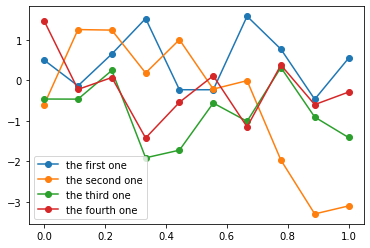

In [4]:
np.random.seed(42)
xe = np.linspace(0, 1, 10)
ye = np.random.normal(0, 1, len(xe))
pl.plot(xe, ye, 'o-', label='the first one')
ye = np.zeros_like(xe)
ye2 = np.random.multivariate_normal(np.r_[ye[-1], ye[:-1]], np.eye(len(xe)))
ye3 = np.random.multivariate_normal(np.zeros_like(xe), np.eye(len(xe)))
for i in range(len(xe)):
    ye[i] = np.random.normal(ye[i-1], 1)
pl.plot(xe, ye, 'o-', label='the second one')
pl.plot(xe, ye2, 'o-', label='the third one')
pl.plot(xe, ye3, 'o-', label='the fourth one')
pl.legend()

In practice, covariance matrices are specified using functions known as kernels. You may find more than one definition of kernel in the statistical literature, with slightly different mathematical properties. For the purpose of our discussion, we are going to say that a kernel is basically a symmetric function that takes two inputs and returns a value of zero in the inputs are the same or positive otherwise. If these conditions are met, we can interpret the output of a kernel function as a measure of similarity between the two inputs.
    $$K =exp\left( \frac{\Vert x-x'\Vert^2}{2 \ell^2}\right)$$

where $\Vert x-x'\Vert^2$ is the squared Eucliden distance:
$$\Vert x-x'\Vert^2 = (x_1 - x'_1)^2 + (x_2 - x'_2)^2 + ... + (x_n -x_n')^2$$

$\ell$ is the length scale (or bandwidth or variance) that controls the width of the kernel.

In [6]:
def exp_quad_kernel(x, knots, ℓ=1):
    """exponentiated quadratic kernel"""
    return np.array([np.exp(-(x-k)**2 / (2*ℓ**2)) for k in knots])

In [24]:
data = np.arange(-1, 3, dtype='i')
cov = exp_quad_kernel(data, data,)

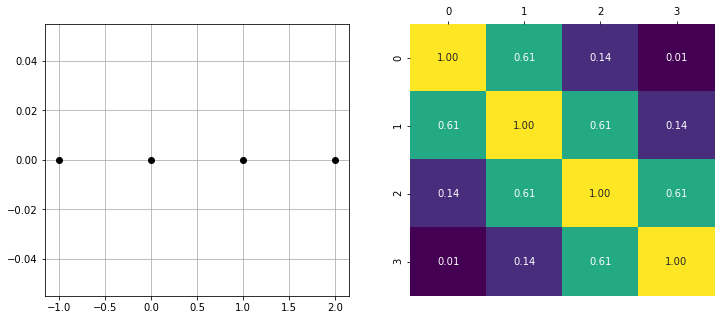

In [26]:
f, ax = pl.subplots(nrows=1, ncols=2, figsize=(12, 5))
ax[0].plot(data, np.zeros_like(data), 'ko')
ax[0].grid()
heatmap(cov, ax=ax[1], cmap='viridis', annot=True, cbar=False, fmt='.2f')
ax[1].xaxis.tick_top()

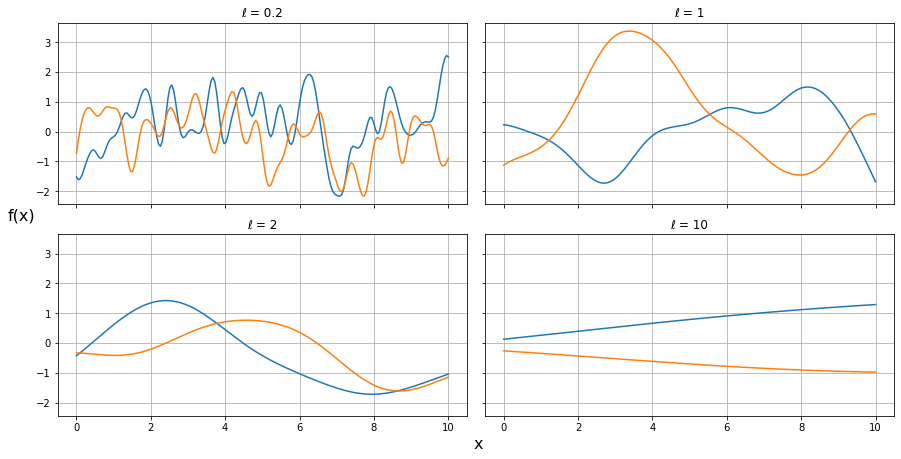

In [31]:
np.random.seed(24)
test_points= np.linspace(0, 10, 200)
f, ax = pl.subplots(2, 2, figsize=(12, 6), sharex=True, sharey=True,
                   constrained_layout=True)
ax = ax.ravel()
for idx, ℓ in enumerate((0.2, 1 , 2, 10)):
    cov = exp_quad_kernel(test_points, test_points, ℓ)
    ax[idx].plot(test_points, stats.multivariate_normal.rvs(cov=cov, size=2).T)
    ax[idx].set_title(f'ℓ = {ℓ}')
    ax[idx].grid()
f.text(0.51, -0.03, 'x', fontsize=16)
f.text(-0.03, 0.5, 'f(x)', fontsize=16);

Gaussian processes are useful for building Bayesian non-parametric models, using them as prior distributions over functions.